This notebook is part of the PyImageJ [Tutorial Series](./notebooks.rst), and assumes familiarity with the ImageJ API. Dedicated tutorials for ImageJ can be found [here](https://imagej.net/tutorials/).

# 4 Converting from Java: `ij.py.from_java()`

`ij.py.from_java()` works in reverse of `ij.py.to_java()` and can be used to further process ImageJ data types with xarray, NumPy, scikit-image, etc. 

First let's initialize ImageJ and open an image from a URL with ImageJ and convert it into Python object. In thise case an `xarray.DataArray`.

## 4.1 Converting between Java and Python

Converting between Java and Python is done using the `ij.py.from_java()` and `ij.py.to_java()` functions. For more information about `ij.py.to_java()`, checkout the previous notebook: [03-Sending-Data-to-Java](03-Sending-Data-to-Java.ipynb). A table of common data types and their converted types is listed below.


| Java object                                                    | Python Object                   |
|----------------------------------------------------------------|---------------------------------|
| `net.imglib2.python.ReferenceGuardingRandomAccessibleInterval` | `numpy.ndarray`                 |
| `net.imagej.Dataset`                                           | `xarray.DataArray`              |
| `java.lang.String`                                             | `str`                           |
| `java.lang.Integer`                                            | `int`                           |
| `java.lang.Float`                                              | `float`                         |
| `java.util.ArrayList`                                          | `list`                          |
| `java.util.LinkedHashMap`                                      | `dict`                          |
| `java.util.ArrayList`                                          | `tuple`                         |

`ij.py.from_java()` is capable of converting common Java/ImageJ/ImageJ2 data types into their Python and NumPy equivalents.

## 4.2 Converting Java objects to Python
We can see how `ij.py.from_java()` works to convert Java objects to Python. In this section we will convert a sample image from Java to Python as an example. First we need to initialize ImageJ:

In [1]:
import imagej

# initialize imagej
ij = imagej.init(mode='interactive')
print(f"ImageJ2 version: {ij.getVersion()}")

ImageJ2 version: 2.14.0/1.54f


Now let's get a test image and convert it from a Java object (`net.imagej.DefaultDataset`) to a Python object (`xarray.DataArray`).

[INFO] Populating metadata


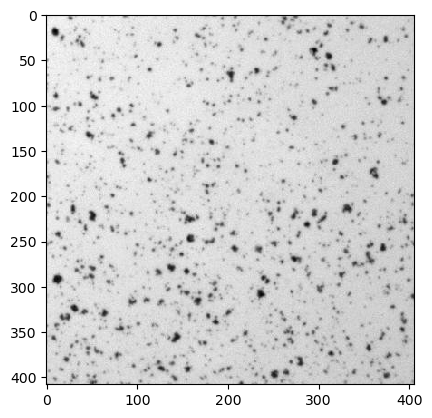

cell_colony type: <java class 'net.imagej.DefaultDataset'>
xr_colony type: <class 'xarray.core.dataarray.DataArray'>


In [2]:
# Load the image
url_colony = 'https://wsr.imagej.net/images/Cell_Colony.jpg'
cell_colony = ij.io().open(url_colony)

# Send the image to Python
xr_colony = ij.py.from_java(cell_colony)

# Display the image
ij.py.show(xr_colony, cmap='gray')

print(f"cell_colony type: {type(cell_colony)}")
print(f"xr_colony type: {type(xr_colony)}")

## 4.3 Special Consideration: RGB and other axis conventions

NumPy/scikitimage dimension order is reverse indexed from ImageJ. ImageJ/ImgLib2 dimension order is [X, Y, Channel, Z, Time] by default. NumPy/scikitimage preferred dimension order is [t, pln, row, col, ch] where t = Time, pln = Z, row = Y, col = X and ch = Channel. Additionally, NumPy and matplotlib have a limited understanding of dimension/axis conventions and only natively handle 3-channel RGB images as [row, col, ch] or [Y, X, Channel]. To handle this difference in dimension/axis order preference, ImageJ images that are converted to output `xarray.DataArray` or `numpy.ndarray` have their re-ordered to match the destination order preference (retaining their metadata when possible).

In [3]:
# load 4D test data
dataset = ij.io().open('sample-data/test_timeseries.tif')

# get xarray
xarr = ij.py.from_java(dataset)

# print out shape and dimensions
print(f"dataset dims, shape: {dataset.dims}, {dataset.shape}")
print(f"xarr dims, shape: {xarr.dims}, {xarr.shape}")

dataset dims, shape: ('X', 'Y', 'Channel', 'Time'), (250, 250, 3, 15)
xarr dims, shape: ('t', 'row', 'col', 'ch'), (15, 250, 250, 3)


Lets look at an RGB image next:

In [4]:
import skimage
import numpy as np

# load the image
astro_img = skimage.data.astronaut()

# Convert the image to a numpy array
astro_arr = ij.py.from_java(astro_img)

print(astro_arr.shape)

(512, 512, 3)


Note that the channel dimension comes last. The image can be plotted diretly:

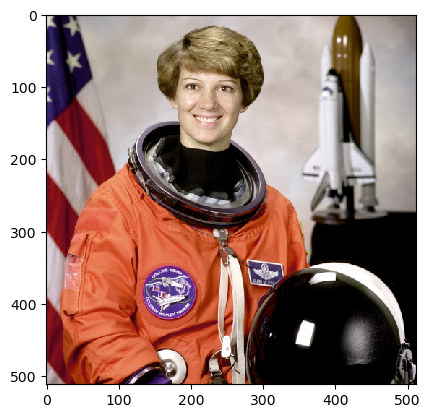

In [5]:
ij.py.show(astro_arr)